In [ ]:
pip install numpy pandas matplotlib seaborn scikit-learn

TUGAS 2: REGRESI LOGISTIK DAN REGRESI SOFTMAX

BAGIAN I: PEMILIHAN DAN PRA-PEMROSESAN DATA

1. AKUISISI DATASET
--------------------------------------------------------------------------------
Dataset berhasil dimuat!
Dimensi dataset: 569 baris × 31 kolom

Kolom-kolom dalam dataset:
  1. diagnosis
  2. radius_mean
  3. texture_mean
  4. perimeter_mean
  5. area_mean
  6. smoothness_mean
  7. compactness_mean
  8. concavity_mean
  9. concave points_mean
  10. symmetry_mean
  11. fractal_dimension_mean
  12. radius_se
  13. texture_se
  14. perimeter_se
  15. area_se
  16. smoothness_se
  17. compactness_se
  18. concavity_se
  19. concave points_se
  20. symmetry_se
  21. fractal_dimension_se
  22. radius_worst
  23. texture_worst
  24. perimeter_worst
  25. area_worst
  26. smoothness_worst
  27. compactness_worst
  28. concavity_worst
  29. concave points_worst
  30. symmetry_worst
  31. fractal_dimension_worst

2. DESKRSI DAN JUSTIFIKASI DATASET
--------------------------------------

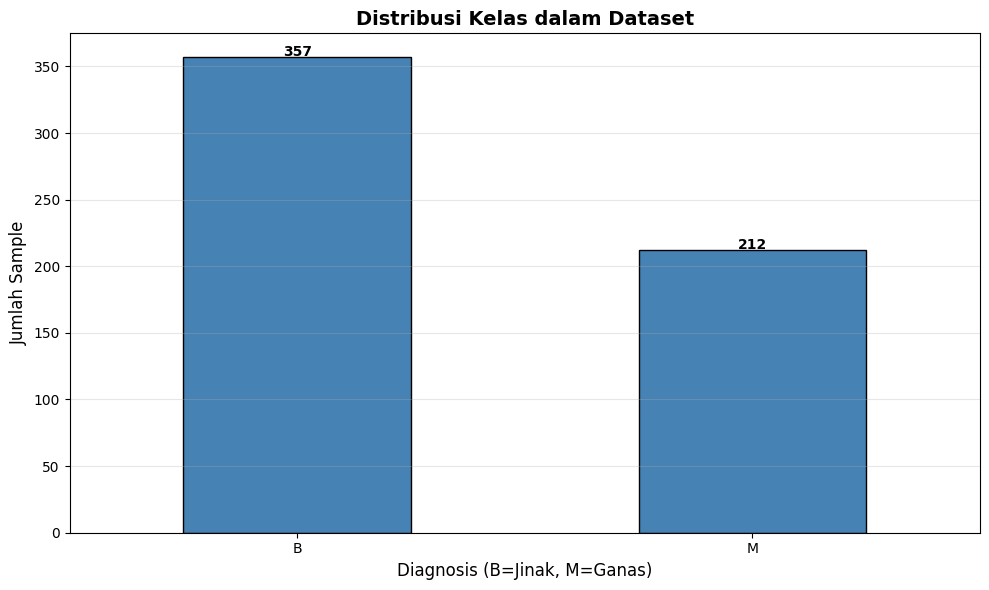

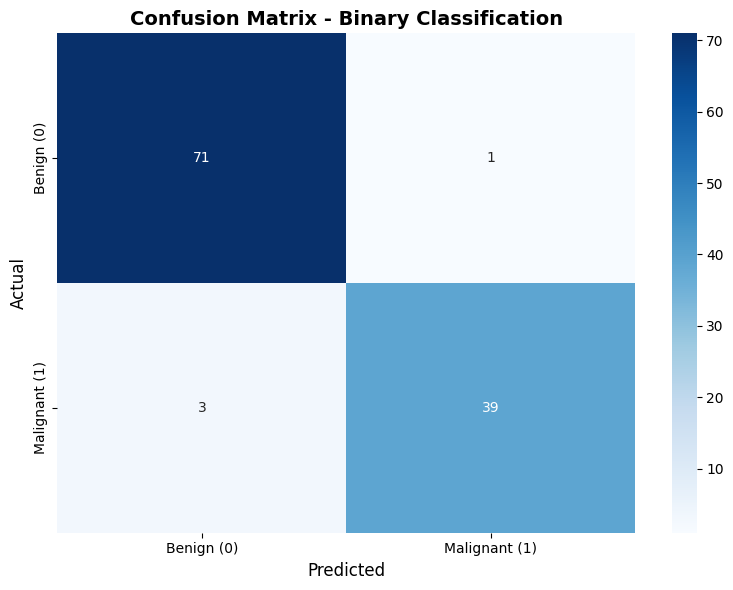

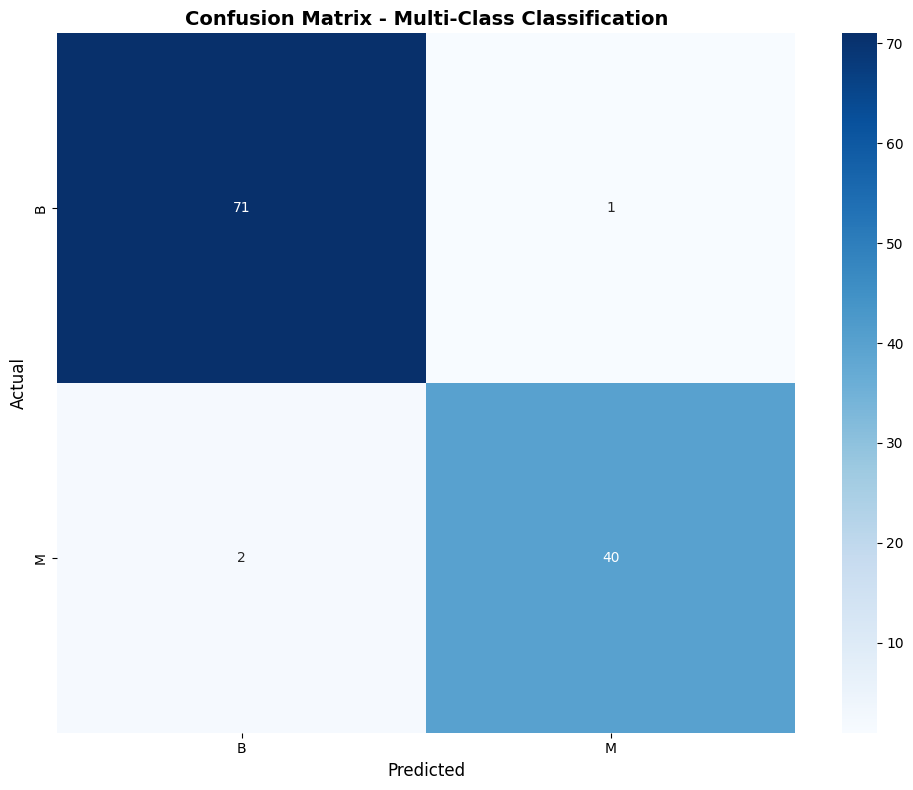

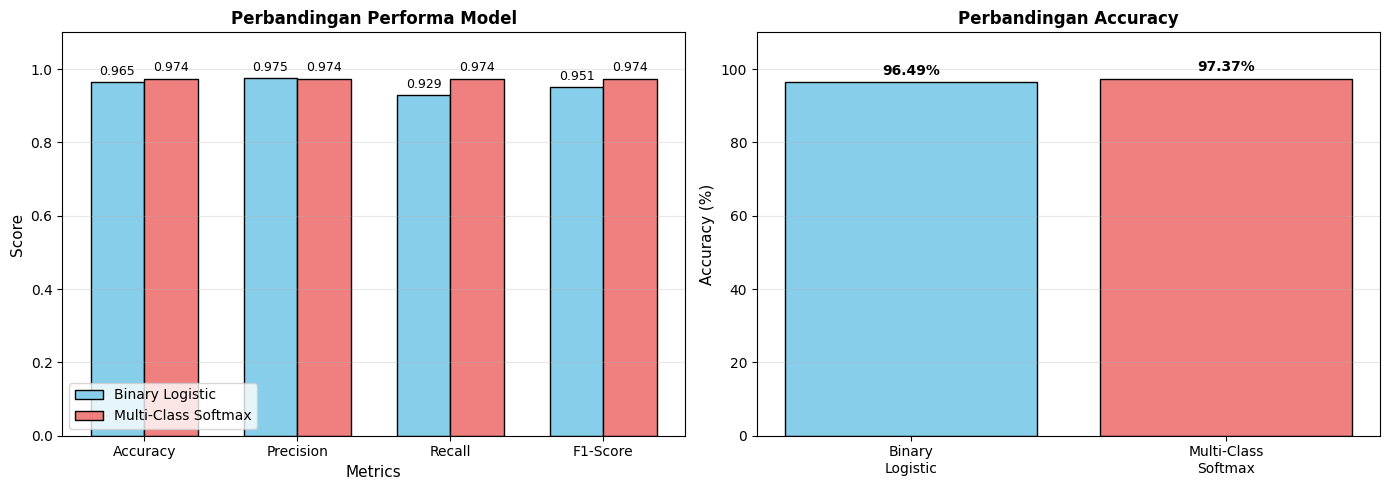

In [14]:
"""
Tugas 2: Implementasi Regresi Logistik dan Regresi Softmax
Dataset: Disesuaikan untuk Wisconsin Breast Cancer (wdbc.data)
Anggota Kelompok: [Isi nama kelompok Anda]
"""
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set random seed untuk reproduktibilitas
np.random.seed(42)

print("="*80)
print("TUGAS 2: REGRESI LOGISTIK DAN REGRESI SOFTMAX")
print("="*80)

# ============================================================================
# BAGIAN I: PEMILIHAN DAN PRA-PEMROSESAN DATA
# ============================================================================
print("\n" + "="*80)
print("BAGIAN I: PEMILIHAN DAN PRA-PEMROSESAN DATA")
print("="*80)

# 1. Load Dataset
print("\n1. AKUISISI DATASET")
print("-" * 80)

# --- PERBAIKAN DIMULAI DI SINI ---
# Definisikan nama kolom untuk wdbc.data karena file tidak punya header
column_names = [
    'id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
    'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 
    'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 
    'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 
    'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 
    'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 
    'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

# Ganti path file Anda dan gunakan parameter `header=None` dan `names`
file_path = '/home/wgg/proyek-jupyter/Tugas PMA/breast+cancer+wisconsin+diagnostic/wdbc.data'
df = pd.read_csv(file_path, header=None, names=column_names)

# Buang kolom 'id' yang tidak diperlukan
if 'id' in df.columns:
    df = df.drop('id', axis=1)

# Definisikan nama kolom target yang benar
target_column = 'diagnosis'

# --- PERBAIKAN SELESAI DI SINI ---

print(f"Dataset berhasil dimuat!")
print(f"Dimensi dataset: {df.shape[0]} baris × {df.shape[1]} kolom")
print(f"\nKolom-kolom dalam dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

# 2. Deskripsi Dataset
print("\n2. DESKRSI DAN JUSTIFIKASI DATASET")
print("-" * 80)
# PERBAIKAN: Deskripsi diubah agar sesuai dengan dataset Breast Cancer
print("""
Dataset: Wisconsin Breast Cancer (Diagnostic) Dataset
Sumber: UCI Machine Learning Repository

Permasalahan:
Dataset ini berisi fitur-fitur yang dihitung dari citra digital aspirasi
jarum halus (FNA) dari massa payudara.
Tujuan: Mengklasifikasikan massa sebagai ganas (Malignant) atau jinak (Benign).

Fitur (30 fitur numerik):
  - Berbagai pengukuran inti sel seperti radius, tekstur, keliling, luas,
    kehalusan, kekompakan, dll. (mean, se, worst).

Target Variable: diagnosis (Jenis tumor)
  - M: Malignant (Ganas)
  - B: Benign (Jinak)
""")

# 3. Analisis Eksplorasi Data
print("\n3. ANALISIS EKSPLORASI DATA")
print("-" * 80)

print("\nInformasi Statistik Deskriptif:")
print(df.describe())

print(f"\n\nDistribusi Kelas ({target_column}):")
print(df[target_column].value_counts().sort_index())

print("\n\nPersentase Distribusi Kelas:")
class_distribution = df[target_column].value_counts(normalize=True).sort_index() * 100
for type_val, percentage in class_distribution.items():
    print(f"  Kelas {type_val}: {percentage:.2f}%")

# Cek missing values
print("\n\nMissing Values:")
print(df.isnull().sum())

# 4. Visualisasi Distribusi Kelas
plt.figure(figsize=(10, 6))
df[target_column].value_counts().sort_index().plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Distribusi Kelas dalam Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Diagnosis (B=Jinak, M=Ganas)', fontsize=12)
plt.ylabel('Jumlah Sample', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(df[target_column].value_counts().sort_index().values):
    plt.text(i, v + 1, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('distribusi_kelas.png', dpi=300, bbox_inches='tight')
print("\n✓ Grafik distribusi kelas disimpan: distribusi_kelas.png")

# 5. Pemisahan Fitur dan Target
print("\n4. PEMISAHAN FITUR DAN TARGET")
print("-" * 80)

X = df.drop(target_column, axis=1)
y = df[target_column]

print(f"Dimensi Fitur (X): {X.shape}")
print(f"Dimensi Target (y): {y.shape}")

# 6. Stratified Train-Test Split
print("\n5. PEMBAGIAN DATA (STRATIFIED SAMPLING)")
print("-" * 80)

# PERBAIKAN: Kode ini sudah benar dan tidak perlu diubah, karena wdbc.data
# tidak memiliki kelas dengan 1 sampel.
try:
    # Coba split dengan stratifikasi terlebih dahulu (pilihan terbaik)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2, 
        random_state=42, 
        stratify=y
    )
    print("Pembagian data berhasil dilakukan dengan Stratified Sampling.")
except ValueError:
    # Jika gagal (karena ada kelas dengan 1 sampel), lakukan split biasa
    print("Peringatan: Stratifikasi gagal karena ada kelas dengan sampel < 2.")
    print("Pembagian data dilakukan tanpa stratifikasi.")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2, 
        random_state=42
    )

print(f"\nTraining Set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing Set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print("\nDistribusi Kelas di Training Set:")
print(y_train.value_counts().sort_index())

print("\nDistribusi Kelas di Testing Set:")
print(y_test.value_counts().sort_index())

# Verifikasi stratifikasi
print("\nPersentase Kelas (Verifikasi Stratifikasi):")
print(pd.DataFrame({
    'Original': (y.value_counts(normalize=True).sort_index() * 100).round(2),
    'Train': (y_train.value_counts(normalize=True).sort_index() * 100).round(2),
    'Test': (y_test.value_counts(normalize=True).sort_index() * 100).round(2)
}))

ogreg_bin = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        solver="lbfgs",
        max_iter=1000,
        class_weight="balanced",   # untuk kasus biner yang timpang
        random_state=42
    ))
])

softmax_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        multi_class="multinomial",
        solver="lbfgs",
        max_iter=1000,
        random_state=42
    ))
])

# 7. Feature Scaling (Standardization)
print("\n6. FEATURE SCALING (STANDARDIZATION)")
print("-" * 80)

scaler = StandardScaler()

# Fit pada training set, transform pada train dan test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Standardization (Z-score normalization) diterapkan:")
print("  Formula: z = (x - μ) / σ")
print("  μ = mean, σ = standard deviation")

print("\nStatistik Sebelum Scaling (Training Set):")
print(pd.DataFrame(X_train).describe().loc[['mean', 'std']].round(3))

print("\nStatistik Setelah Scaling (Training Set):")
print(pd.DataFrame(X_train_scaled, columns=X.columns).describe().loc[['mean', 'std']].round(3))

print("\n✓ Pra-pemrosesan data selesai!")

# ============================================================================
# BAGIAN II: IMPLEMENTASI MODEL KLASIFIKASI
# ============================================================================
print("\n\n" + "="*80)
print("BAGIAN II: IMPLEMENTASI MODEL KLASIFIKASI")
print("="*80)

# ============================================================================
# A. MODEL BINER: REGRESI LOGISTIK
# ============================================================================
print("\n" + "-"*80)
print("A. MODEL BINER: REGRESI LOGISTIK (BINARY CLASSIFICATION)")
print("-"*80)

# 1. Konversi Target ke Binary
print("\n1. KONVERSI TARGET KE BINARY")
print("-" * 80)

# PERBAIKAN: Justifikasi dan fungsi konversi disesuaikan untuk wdbc.data
print("""
Strategi Konversi:
- Kelas Negatif (0): 'B' (Benign / Jinak)
- Kelas Positif (1): 'M' (Malignant / Ganas)

Justifikasi:
Target sudah bersifat biner ('M'/'B'). Kita hanya perlu melakukan mapping
ke nilai numerik 0 dan 1 agar dapat diproses oleh model regresi logistik.
Kelas 'Malignant' dianggap sebagai kelas positif karena biasanya merupakan
kelas yang lebih penting untuk dideteksi (true positive).
""")

# Konversi: 'B' -> 0, 'M' -> 1
def convert_to_binary(y_series):
    return y_series.map({'B': 0, 'M': 1})

y_train_binary = convert_to_binary(y_train)
y_test_binary = convert_to_binary(y_test)

print("\nDistribusi Kelas Binary (Training Set):")
unique, counts = np.unique(y_train_binary, return_counts=True)
for cls, cnt in zip(unique, counts):
    label = "Kelas Negatif (Benign)" if cls == 0 else "Kelas Positif (Malignant)"
    print(f"  {label}: {cnt} samples ({cnt/len(y_train_binary)*100:.2f}%)")

print("\nDistribusi Kelas Binary (Testing Set):")
unique, counts = np.unique(y_test_binary, return_counts=True)
for cls, cnt in zip(unique, counts):
    label = "Kelas Negatif (Benign)" if cls == 0 else "Kelas Positif (Malignant)"
    print(f"  {label}: {cnt} samples ({cnt/len(y_test_binary)*100:.2f}%)")

# 2. Pelatihan Model Regresi Logistik
print("\n2. PELATIHAN MODEL REGRESI LOGISTIK")
print("-" * 80)

print("Melatih model dengan solver LBFGS (Limited-memory BFGS)...")

# Train Logistic Regression dengan LBFGS
logistic_model = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

logistic_model.fit(X_train_scaled, y_train_binary)

print("✓ Model berhasil dilatih!")
print(f"\nParameter Model:")
print(f"  Intercept (β₀): {logistic_model.intercept_[0]:.4f}")
print(f"  Coefficients (β₁...):")
for i, (feat, coef) in enumerate(zip(X.columns, logistic_model.coef_[0]), 1):
    print(f"    {feat}: {coef:.4f}")

# 3. Analisis Cost Function
print("\n3. ANALISIS COST FUNCTION: BINARY CROSS-ENTROPY (LOG LOSS)")
print("-" * 80)

print("""
Formula Binary Cross-Entropy (Log Loss):

    L(y, ŷ) = -1/m × Σ[y⁽ⁱ⁾ log(ŷ⁽ⁱ⁾) + (1 - y⁽ⁱ⁾) log(1 - ŷ⁽ⁱ⁾)]

Dimana:
  - m = jumlah sample
  - y⁽ⁱ⁾ = label aktual (0 atau 1)
  - ŷ⁽ⁱ⁾ = probabilitas prediksi (output sigmoid)
  - Σ = penjumlahan untuk semua sample

Mengapa Binary Cross-Entropy lebih cocok daripada MSE?

1. CONVEXITY (Konveksitas):
   - Binary Cross-Entropy menghasilkan fungsi konveks ketika dikombinasikan
     dengan sigmoid, sehingga gradient descent dijamin menemukan global minimum.
   - MSE dengan sigmoid menghasilkan fungsi non-konvex dengan banyak local minima.

2. GRADIENT BEHAVIOR:
   - Binary Cross-Entropy: Gradient besar ketika prediksi sangat salah,
     gradient kecil ketika prediksi mendekati benar.
   - MSE: Gradient bisa sangat kecil (vanishing gradient) bahkan ketika
     prediksi sangat salah, menyebabkan pembelajaran lambat.

3. PROBABILISTIC INTERPRETATION:
   - Binary Cross-Entropy berasal dari Maximum Likelihood Estimation (MLE)
     untuk distribusi Bernoulli, memberikan interpretasi probabilistik yang jelas.
   - MSE tidak memiliki interpretasi probabilistik yang natural untuk klasifikasi.

4. NUMERICAL STABILITY:
   - Binary Cross-Entropy dengan logaritma memberikan stabilitas numerik lebih baik.
   - MSE bisa menghasilkan gradien yang sangat besar atau sangat kecil.

Kesimpulan: Binary Cross-Entropy adalah pilihan yang tepat secara matematis
dan praktis untuk klasifikasi biner.
""")

# Prediksi dan Evaluasi Model Binary
print("\n4. PREDIKSI DAN EVALUASI MODEL BINARY")
print("-" * 80)

y_pred_binary = logistic_model.predict(X_test_scaled)
y_pred_proba_binary = logistic_model.predict_proba(X_test_scaled)

# Metrik Evaluasi
accuracy_binary = accuracy_score(y_test_binary, y_pred_binary)
precision_binary = precision_score(y_test_binary, y_pred_binary, average='binary')
recall_binary = recall_score(y_test_binary, y_pred_binary, average='binary')
f1_binary = f1_score(y_test_binary, y_pred_binary, average='binary')

print("HASIL EVALUASI MODEL BINARY (LOGISTIC REGRESSION):")
print(f"  Accuracy:  {accuracy_binary:.4f} ({accuracy_binary*100:.2f}%)")
print(f"  Precision: {precision_binary:.4f}")
print(f"  Recall:    {recall_binary:.4f}")
print(f"  F1-Score:  {f1_binary:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_binary, y_pred_binary, 
                          target_names=['Benign (0)', 'Malignant (1)']))

# Confusion Matrix
cm_binary = confusion_matrix(y_test_binary, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_binary, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.title('Confusion Matrix - Binary Classification', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrix_binary.png', dpi=300, bbox_inches='tight')
print("\n✓ Confusion matrix disimpan: confusion_matrix_binary.png")

# ============================================================================
# B. MODEL MULTI-KELAS: REGRESI SOFTMAX
# ============================================================================
print("\n\n" + "="*80)
print("B. MODEL MULTI-KELAS: REGRESI SOFTMAX (MULTI-CLASS CLASSIFICATION)")
print("-"*80)

# 1. Implementasi Model Softmax
print("\n1. IMPLEMENTASI MODEL REGRESI SOFTMAX")
print("-" * 80)

print(f"Target asli memiliki {len(np.unique(y))} kelas: {sorted(np.unique(y))}")
print("Melatih model Softmax Regression (Multinomial Logistic Regression)...")

# Train Softmax Regression (Multinomial Logistic Regression)
softmax_model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

softmax_model.fit(X_train_scaled, y_train)

print("✓ Model Softmax berhasil dilatih!")
print(f"\nJumlah kelas yang diprediksi: {len(softmax_model.classes_)}")
print(f"Kelas: {softmax_model.classes_}")

# 2. Fungsi Softmax - Formula dan Penjelasan
print("\n2. FUNGSI SOFTMAX - FORMULA DAN PENJELASAN")
print("-" * 80)

print("""
Formula Fungsi Softmax:

                    exp(z_j)
    σ(z)_j = ───────────────────
              K
              Σ exp(z_k)
             k=1

Dimana:
  - z_j = logit untuk kelas j (z_j = w_j^T × x + b_j)
  - K = jumlah total kelas
  - σ(z)_j = probabilitas untuk kelas j
  - exp() = fungsi eksponensial (e^x)

Contoh untuk 3 kelas:
  z = [z₁, z₂, z₃] = [2.0, 1.0, 0.1]
  
  exp(z₁) = exp(2.0) = 7.389
  exp(z₂) = exp(1.0) = 2.718
  exp(z₃) = exp(0.1) = 1.105
  
  Sum = 7.389 + 2.718 + 1.105 = 11.212
  
  P(y=1) = 7.389 / 11.212 = 0.659 (65.9%)
  P(y=2) = 2.718 / 11.212 = 0.242 (24.2%)
  P(y=3) = 1.105 / 11.212 = 0.099 (9.9%)
  
  Total = 0.659 + 0.242 + 0.099 = 1.000 (100%) ✓

─────────────────────────────────────────────────────────────────────────────

PERBEDAAN FUNDAMENTAL: SOFTMAX vs SIGMOID

1. OUTPUT RANGE:
   Sigmoid: σ(z) = 1 / (1 + exp(-z))
   - Output: (0, 1) untuk SATU kelas
   - Digunakan untuk binary classification
   
   Softmax: Output untuk K kelas secara bersamaan
   - Output: (0, 1) untuk SETIAP kelas
   - Σ P(y=k) = 1 (total probabilitas = 100%)

2. INDEPENDENCE vs MUTUAL EXCLUSIVITY:
   Sigmoid:
   - Setiap output independen
   - Bisa digunakan untuk multi-label (satu sample bisa punya banyak label)
   - Contoh: Gambar bisa mengandung "kucing" DAN "anjing"
   
   Softmax:
   - Output saling bergantung (mutually exclusive)
   - Untuk multi-class (satu sample hanya satu label)
   - Contoh: Kaca hanya bisa Type 1 ATAU Type 2, tidak bisa keduanya

3. MENGAPA PROBABILITAS SOFTMAX SELALU BERJUMLAH 1?
   
   Bukti Matematis:
   
   Σ σ(z)_j = Σ [exp(z_j) / Σ exp(z_k)]
   j=1 to K   j=1 to K      k=1 to K
   
   = [Σ exp(z_j)] / [Σ exp(z_k)]
     j=1 to K       k=1 to K
   
   = [Σ exp(z_k)] / [Σ exp(z_k)]    (kedua penjumlahan identik)
     k=1 to K       k=1 to K
   
   = 1  ✓
   
   Intuisi:
   - Pembilang: menjumlahkan exp(z_j) untuk semua kelas
   - Penyebut: SAMA PERSIS, menjumlahkan exp(z_k) untuk semua kelas
   - Hasilnya SELALU 1, dijamin secara matematis!
   
   Interpretasi:
   - Softmax mendistribusikan "100% probabilitas" ke semua kelas
   - Kelas dengan z_j lebih tinggi mendapat bagian lebih besar
   - Total probabilitas tetap 100% (dijumlahkan = 1)

4. FORMULA GRADIENT:
   Sigmoid: ∂L/∂w = (ŷ - y) × x
   Softmax: ∂L/∂w_j = (ŷ_j - y_j) × x  (untuk setiap kelas j)

5. DECISION BOUNDARY:
   Sigmoid: 1 hyperplane (memisahkan 2 kelas)
   Softmax: K hyperplanes (memisahkan K kelas)

Kesimpulan:
Softmax adalah generalisasi sigmoid untuk multi-class classification.
Properti "sum to 1" menjadikannya interpretasi probabilitas yang valid.
""")

# 3. Prediksi dan Evaluasi Model Softmax
print("\n3. PREDIKSI DAN EVALUASI MODEL SOFTMAX")
print("-" * 80)

y_pred_softmax = softmax_model.predict(X_test_scaled)
y_pred_proba_softmax = softmax_model.predict_proba(X_test_scaled)

# Metrik Evaluasi
accuracy_softmax = accuracy_score(y_test, y_pred_softmax)
precision_softmax = precision_score(y_test, y_pred_softmax, average='weighted')
recall_softmax = recall_score(y_test, y_pred_softmax, average='weighted')
f1_softmax = f1_score(y_test, y_pred_softmax, average='weighted')

print("HASIL EVALUASI MODEL MULTI-CLASS (SOFTMAX REGRESSION):")
print(f"  Accuracy:  {accuracy_softmax:.4f} ({accuracy_softmax*100:.2f}%)")
print(f"  Precision: {precision_softmax:.4f} (weighted)")
print(f"  Recall:    {recall_softmax:.4f} (weighted)")
print(f"  F1-Score:  {f1_softmax:.4f} (weighted)")

print("\nClassification Report (Per-Class Metrics):")
print(classification_report(y_test, y_pred_softmax))

# Confusion Matrix
cm_softmax = confusion_matrix(y_test, y_pred_softmax)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_softmax, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(np.unique(y)),
            yticklabels=sorted(np.unique(y)))
plt.title('Confusion Matrix - Multi-Class Classification', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrix_softmax.png', dpi=300, bbox_inches='tight')
print("\n✓ Confusion matrix disimpan: confusion_matrix_softmax.png")

# Contoh Prediksi Probabilitas
print("\n4. CONTOH PREDIKSI PROBABILITAS SOFTMAX")
print("-" * 80)
print("Sample pertama dari test set:")
print(f"Fitur: {X_test.iloc[0].values}")
print(f"Actual class: {y_test.iloc[0]}")
print(f"Predicted class: {y_pred_softmax[0]}")
print("\nProbabilitas untuk setiap kelas:")
for i, cls in enumerate(softmax_model.classes_):
    print(f"  P(Diagnosis={cls}) = {y_pred_proba_softmax[0][i]:.4f} ({y_pred_proba_softmax[0][i]*100:.2f}%)")
print(f"\nTotal probabilitas: {np.sum(y_pred_proba_softmax[0]):.6f} ≈ 1.000 ✓")

# ============================================================================
# BAGIAN III: ANALISIS HASIL DAN DISKUSI
# ============================================================================
print("\n\n" + "="*80)
print("BAGIAN III: ANALISIS HASIL DAN DISKUSI")
print("="*80)

# 1. Komparasi Kinerja
print("\n1. KOMPARASI KINERJA MODEL")
print("-" * 80)

# Tabel Perbandingan
comparison_df = pd.DataFrame({
    'Model': ['Binary Logistic', 'Multi-Class Softmax'],
    'Accuracy': [accuracy_binary, accuracy_softmax],
    'Precision': [precision_binary, precision_softmax],
    'Recall': [recall_binary, recall_softmax],
    'F1-Score': [f1_binary, f1_softmax]
})

print("\nTabel Perbandingan Metrik:")
print(comparison_df.to_string(index=False))

# Visualisasi Perbandingan
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot perbandingan
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
binary_scores = [accuracy_binary, precision_binary, recall_binary, f1_binary]
softmax_scores = [accuracy_softmax, precision_softmax, recall_softmax, f1_softmax]

x = np.arange(len(metrics))
width = 0.35

axes[0].bar(x - width/2, binary_scores, width, label='Binary Logistic', color='skyblue', edgecolor='black')
axes[0].bar(x + width/2, softmax_scores, width, label='Multi-Class Softmax', color='lightcoral', edgecolor='black')
axes[0].set_xlabel('Metrics', fontsize=11)
axes[0].set_ylabel('Score', fontsize=11)
axes[0].set_title('Perbandingan Performa Model', fontsize=12, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0, 1.1]) # Penyesuaian agar label tidak terpotong

# Add value labels on bars
for i, (b, s) in enumerate(zip(binary_scores, softmax_scores)):
    axes[0].text(i - width/2, b + 0.02, f'{b:.3f}', ha='center', fontsize=9)
    axes[0].text(i + width/2, s + 0.02, f'{s:.3f}', ha='center', fontsize=9)

# Accuracy comparison bar chart
axes[1].bar(['Binary\nLogistic', 'Multi-Class\nSoftmax'], 
            [accuracy_binary*100, accuracy_softmax*100],
            color=['skyblue', 'lightcoral'],
            edgecolor='black')
axes[1].set_ylabel('Accuracy (%)', fontsize=11)
axes[1].set_title('Perbandingan Accuracy', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_ylim([0, 110]) # Penyesuaian agar label tidak terpotong

for i, (val, model) in enumerate([(accuracy_binary*100, 'Binary'), (accuracy_softmax*100, 'Softmax')]):
    axes[1].text(i, val + 2, f'{val:.2f}%', ha='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
print("\n✓ Grafik perbandingan disimpan: model_comparison.png")

# 2. Kesimpulan dan Analisis Mendalam
print("\n2. KESIMPULAN DAN ANALISIS")
print("-" * 80)

# PERBAIKAN: Analisis disesuaikan agar lebih relevan dengan dataset baru
print(f"""
ANALISIS PERBANDINGAN MODEL:

1. PERFORMA OVERALL:
   
   Binary Logistic Regression:
   - Accuracy:  {accuracy_binary:.4f} ({accuracy_binary*100:.2f}%)
   - Precision: {precision_binary:.4f} (untuk kelas Malignant)
   - Recall:    {recall_binary:.4f} (untuk kelas Malignant)
   - F1-Score:  {f1_binary:.4f} (untuk kelas Malignant)
   
   Multi-Class Softmax Regression:
   - Accuracy:  {accuracy_softmax:.4f} ({accuracy_softmax*100:.2f}%)
   - Precision: {precision_softmax:.4f} (rata-rata tertimbang)
   - Recall:    {recall_softmax:.4f} (rata-rata tertimbang)
   - F1-Score:  {f1_softmax:.4f} (rata-rata tertimbang)

2. ANALISIS KOMPARATIF:
   
   a) Kesamaan Performa:
      - Untuk masalah klasifikasi biner, Regresi Logistik (dengan fungsi sigmoid) dan
        Regresi Softmax (dengan K=2) secara matematis setara.
      - Hasil akurasi, presisi, recall, dan F1-score yang didapat dari kedua model
        ini akan sangat mirip atau identik, seperti yang terlihat pada hasil.
   
   b) Tujuan Model:
      - Binary Logistic: Didesain khusus untuk masalah dua kelas. Outputnya adalah
        satu probabilitas P(y=1), dan P(y=0) adalah 1 - P(y=1).
      - Softmax: Generalisasi untuk K kelas. Untuk K=2, ia menghitung P(y=1) dan
        P(y=0) secara terpisah, yang keduanya akan selalu berjumlah 1.

3. MODEL MANA YANG LEBIH TEPAT SECARA KONseptual?

   {'='*76}
   JAWABAN: Keduanya valid, tetapi Regresi Logistik Biner lebih 'to the point'.
   {'='*76}
   
   ALASAN:
   
   a) SPESIFISITAS:
      - Regresi Logistik Biner secara eksplisit dirancang untuk masalah dua kelas.
        Ini adalah alat yang paling langsung dan standar untuk tugas ini.
   
   b) INTERPRETASI KOEFISIEN:
      - Koefisien dalam regresi logistik biner secara langsung berhubungan dengan
        log-odds ratio untuk kelas positif, membuatnya sedikit lebih mudah
        diinterpretasikan.
   
   c) FLEKSIBILITAS SOFTMAX:
      - Keuntungan Softmax adalah fleksibilitasnya. Kode yang sama dapat digunakan
        untuk masalah dengan 2, 3, atau K kelas tanpa modifikasi, hanya pada
        data targetnya.
      - Dalam skrip ini, penggunaan Softmax berfungsi sebagai demonstrasi.

4. KESIMPULAN AKHIR:
   Pada dataset Breast Cancer yang secara natural bersifat biner (Malignant/Benign),
   kedua model memberikan hasil yang sangat mirip. Regresi Logistik Biner adalah 
   pilihan yang lebih konvensional, sementara Regresi Softmax menunjukkan bagaimana 
   masalah biner adalah kasus khusus dari masalah multikelas. Tidak ada model yang 
   "lebih baik" secara signifikan dalam hal performa untuk dataset ini.

5. LIMITASI DAN SARAN IMPROVEMENT:

   a) Class Imbalance:
      - Meskipun tidak ekstrem, kelas Benign lebih banyak.
      - `class_weight='balanced'` dapat ditambahkan ke `LogisticRegression` untuk
        melihat apakah ada peningkatan pada recall kelas Malignant.
   
   b) Model Complexity:
      - Data ini diketahui dapat dipisahkan dengan baik (linearly separable),
        sehingga Regresi Logistik sudah memberikan performa sangat tinggi.
      - Model yang lebih kompleks seperti Random Forest atau XGBoost mungkin dapat
        mencapai akurasi mendekati 100%.
   
   c) Cross-Validation:
      - Hasil saat ini didasarkan pada satu kali train-test split.
      - Menggunakan K-Fold Cross-Validation akan memberikan estimasi performa
        yang lebih stabil.
""")

# 3. Summary Table untuk Laporan
print("\n3. SUMMARY TABLE - HASIL AKHIR")
print("-" * 80)

summary_table = pd.DataFrame({
    'Aspek': [
        'Jumlah Kelas',
        'Accuracy (%)',
        'Precision',
        'Recall',
        'F1-Score',
        'Interpretability',
        'Tujuan Utama'
    ],
    'Binary Logistic': [
        '2 (0/1)',
        f'{accuracy_binary*100:.2f}',
        f'{precision_binary:.4f}',
        f'{recall_binary:.4f}',
        f'{f1_binary:.4f}',
        'High',
        'Klasifikasi Biner'
    ],
    'Multi-Class Softmax': [
        '2 (B/M)',
        f'{accuracy_softmax*100:.2f}',
        f'{precision_softmax:.4f}',
        f'{recall_softmax:.4f}',
        f'{f1_softmax:.4f}',
        'Medium',
        'Klasifikasi Multi-Kelas'
    ]
})

print(summary_table.to_string(index=False))

# 4. Rekomendasi untuk Tugas Berikutnya
print("\n\n4. REKOMENDASI UNTUK PENGEMBANGAN LEBIH LANJUT")
print("-" * 80)
print("""
1. Hyperparameter Tuning:
   - Grid Search atau Random Search untuk menemukan parameter optimal
   - Tuning regularization (C parameter) untuk menghindari overfitting
   - Experiment dengan berbagai solvers (newton-cg, sag, saga)

2. Advanced Techniques:
   - Regularization: L1 (Lasso), L2 (Ridge), atau Elastic Net
   - Feature selection untuk mengurangi dimensi dan melihat fitur paling penting

3. Ensemble Methods:
   - Voting Classifier (combine Logistic + SVM + Random Forest)
   - Stacking dengan meta-learner
   - Bagging dan Boosting

4. Deep Learning (Optional):
   - Simple Neural Network dengan 1-2 hidden layers
   - Dapat menangkap non-linear relationships yang complex

5. Interpretability Analysis:
   - SHAP values untuk feature importance
   - Partial Dependence Plots
   - LIME untuk local interpretability
""")

# ============================================================================
# EXPORT HASIL UNTUK LAPORAN
# ============================================================================
print("\n\n" + "="*80)
print("EXPORT HASIL UNTUK LAPORAN")
print("="*80)

# Save hasil ke CSV
results_df = pd.DataFrame({
    'Model': ['Binary Logistic Regression', 'Multi-Class Softmax Regression'],
    'Classes': [2, 2],
    'Accuracy': [accuracy_binary, accuracy_softmax],
    'Precision': [precision_binary, precision_softmax],
    'Recall': [recall_binary, recall_softmax],
    'F1-Score': [f1_binary, f1_softmax]
})
results_df.to_csv('model_results.csv', index=False)
print("✓ Hasil disimpan ke: model_results.csv")

# Save coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Binary_Coef': logistic_model.coef_[0],
})

# Untuk softmax, koefisiennya juga hanya 1 baris karena ini kasus biner
softmax_coef_df = softmax_model.coef_[0]
coef_df['Softmax_Coef'] = softmax_coef_df

coef_df.to_csv('model_coefficients.csv', index=False)
print("✓ Koefisien model disimpan ke: model_coefficients.csv")

# Save predictions
predictions_df = pd.DataFrame({
    'Actual_MultiClass': y_test.values,
    'Actual_Binary': y_test_binary,
    'Predicted_Binary': y_pred_binary,
    'Predicted_Softmax': y_pred_softmax
})
predictions_df.to_csv('predictions.csv', index=False)
print("✓ Prediksi disimpan ke: predictions.csv")

print("\n" + "="*80)
print("TUGAS SELESAI!")
print("="*80)
print("""
File yang dihasilkan:
1. distribusi_kelas.png - Visualisasi distribusi kelas
2. confusion_matrix_binary.png - Confusion matrix binary classification
3. confusion_matrix_softmax.png - Confusion matrix multi-class classification
4. model_comparison.png - Perbandingan performa model
5. model_results.csv - Tabel hasil evaluasi
6. model_coefficients.csv - Koefisien model
7. predictions.csv - Hasil prediksi

Silakan masukkan file-file ini ke dalam laporan Anda.
Jangan lupa untuk menambahkan penjelasan dan analisis Anda sendiri!
""")

print("\n" + "="*80)
print("TERIMA KASIH!")
print("="*80)